In [ ]:
import numpy as np
import keras
import sklearn as sk
import cv2
from keras.applications.resnet import ResNet152
from keras.utils.vis_utils import plot_model
from keras.models import Model
from keras.layers import Input, Dense, Flatten, LSTM, ConvLSTM2D, Reshape, Conv2D, Dropout, BatchNormalization
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.layers.wrappers import TimeDistributed
import glob
import os
import tensorflow as tf
import json
import pytictoc
from keras.models import model_from_json

In [ ]:
pip install pytictoc

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# load json and create model
ResNet_152_json_file = open('/content/drive/My Drive/deep learning/Saved_Model/ResNet_152.json', 'r')
loaded_model_json = ResNet_152_json_file.read()
ResNet_152_json_file.close()
ResNet_152_loaded = model_from_json(loaded_model_json)
# load weights into new model
ResNet_152_loaded.load_weights("/content/drive/My Drive/deep learning/Saved_Model/Weights/ResNet_152.h5")
print("Loaded model from disk")

Loaded model from disk


In [ ]:
time_print = pytictoc.TicToc()
time_print.tic()

num_frames = 100
frame_rate = 5

test_list = []
test_time_list = []


for path in glob.glob('/content/drive/My Drive/CSCE636/10_test/*.mp4'):
  
  videos = []
  labels_2d = []

  time_3d = []
  time_2d = []
  
  vidcap = cv2.VideoCapture(path)
  # split vidcap
  # for i in split
  seconds = int(vidcap.get(cv2.CAP_PROP_FRAME_COUNT) / int(vidcap.get(cv2.CAP_PROP_FPS)))
  fps = vidcap.get(cv2.CAP_PROP_FPS)
  success, image = vidcap.read()
  frames = []
  

  time = []
  count = 0  # control to have the same number of frames
  count_fps = 0
  while success:
    
    
    success, image = vidcap.read()
    count += 1
    if(type(image).__module__ == np.__name__):
      new_image = cv2.resize(image, (224,224), interpolation = cv2.INTER_AREA)
      
      frames.append(new_image)
      time.append(count_fps*(1/fps))
      count_fps += 1
      if count==num_frames:
        count_fps = 0
        print("Frames_", str(count),", video_", str(i), "Done, Time_Elapsed: ", str(round(time_print.tocvalue(),3)), " Seconds")
        videos.append(frames)
        time_3d.append(time)
        count = 0
        frames = []
        time = []

  if (count < num_frames):
    while (count > 0 and count <= num_frames):
      frames.append(new_image)    # if the number of frames is lower than the num_frames, repeat the last image to reach num_frames
      count +=1
      time.append(count_fps*(1/fps))
      count_fps += 1
      
    videos.append(frames)
    time_3d.append(time)
  
  i+=1
  print("Video_", str(i),"Done, Time_Elapsed: ", str(round(time_print.tocvalue(),3)), " Seconds")


  videos_2d_len = len(videos)
  videos_3d = np.array(videos)

  labels_2d = np.zeros((len(videos_3d),num_frames))
  labels_2d[0:videos_2d_len,:] = 1

  time_3d = np.array(time_3d)

  # ind = list(np.random.randint(0,len(videos_3d)-1,size=len(videos_3d)))
  videos_3d_temp = videos_3d
  videos_2d_shuffled = np.reshape(videos_3d_temp, (-1,224,224,3))
  videos_2d_shuffled = videos_2d_shuffled[:len(videos_2d_shuffled):frame_rate]

  time_3d_temp = time_3d
  time_2d_shuffled = np.reshape(time_3d_temp, (-1,1))
  time_2d_shuffled = time_2d_shuffled[:len(time_2d_shuffled):frame_rate]
  time_2d_shuffled = time_2d_shuffled.T[0]

  labels_2d_temp = labels_2d
  labels_2d_shuffled = labels_2d_temp.flatten()
  labels_2d_shuffled = labels_2d_shuffled[:len(labels_2d_shuffled):frame_rate]

  u_test = ResNet_152_loaded.predict(videos_2d_shuffled)
  time_u = np.linspace(0, seconds, num=len(u_test), endpoint=False).reshape(len(u_test),1)
  # end_time = time_u[-1]
  test_list.append(u_test)
  test_time_list.append(time_u+end_time)

Video_ 5 Done, Time_Elapsed:  0.121  Seconds
Frames_ 100 , video_ 5 Done, Time_Elapsed:  0.506  Seconds
Video_ 6 Done, Time_Elapsed:  0.627  Seconds
Video_ 7 Done, Time_Elapsed:  1.062  Seconds
Video_ 8 Done, Time_Elapsed:  1.286  Seconds
Video_ 9 Done, Time_Elapsed:  1.599  Seconds
Frames_ 100 , video_ 9 Done, Time_Elapsed:  2.363  Seconds
Frames_ 100 , video_ 9 Done, Time_Elapsed:  2.517  Seconds
Video_ 10 Done, Time_Elapsed:  2.659  Seconds


In [ ]:
threshold = 0.9

times = []
for i in range(len(test_list)):
  times.append(test_time_list[i][np.argwhere(test_list[i].reshape(-1)>threshold)].reshape(-1))

In [ ]:
#for i in times

In [ ]:
36.4 , 36.6, 36.8

0.4

In [ ]:
time_u = np.linspace(0, seconds, num=len(u_test), endpoint=False).reshape(len(u_test),1)

In [ ]:
time_u.shape

(60, 1)

In [ ]:
u_test.shape

(60, 1)

In [ ]:
# ind = list(np.random.randint(0,len(videos_3d)-1,size=len(videos_3d)))
videos_3d_temp = videos_3d
videos_2d_shuffled = np.reshape(videos_3d_temp, (-1,224,224,3))
videos_2d_shuffled = videos_2d_shuffled[:len(videos_2d_shuffled):frame_rate]

time_3d_temp = time_3d
time_2d_shuffled = np.reshape(time_3d_temp, (-1,1))
time_2d_shuffled = time_2d_shuffled[:len(time_2d_shuffled):frame_rate]
time_2d_shuffled = time_2d_shuffled.T[0]

labels_2d_temp = labels_2d
labels_2d_shuffled = labels_2d_temp.flatten()
labels_2d_shuffled = labels_2d_shuffled[:len(labels_2d_shuffled):frame_rate]

In [ ]:
u_test = ResNet_152_loaded.predict(videos_2d_shuffled)

In [ ]:
u_test


array([[6.0311060e-05],
       [1.8255763e-04],
       [2.1175144e-04],
       [6.5799861e-05],
       [4.2732878e-05],
       [2.6140364e-05],
       [4.5976234e-05],
       [5.3302869e-05],
       [4.7883419e-05],
       [8.8748566e-05],
       [6.5711378e-05],
       [9.2546805e-05],
       [2.4049358e-04],
       [7.6967018e-04],
       [5.4192770e-04],
       [2.7554377e-04],
       [2.1188293e-04],
       [1.0091838e-04],
       [6.2610913e-04],
       [1.1819048e-03],
       [2.3163318e-04],
       [1.8961723e-04],
       [5.1822677e-05],
       [2.4471030e-05],
       [4.7421767e-05],
       [4.8822949e-05],
       [4.4714488e-05],
       [2.8436445e-05],
       [1.8567218e-05],
       [1.8566208e-05],
       [3.3968146e-05],
       [5.6080899e-05],
       [6.0860097e-05],
       [1.6920717e-04],
       [9.3255607e-05],
       [1.4906844e-04],
       [7.0777765e-05],
       [1.7213752e-05],
       [1.6135995e-05],
       [1.0459035e-05],
       [4.0467530e-05],
       [2.875133

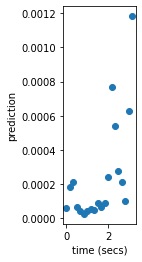

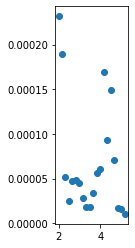

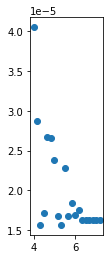

In [ ]:
clip_length = int(num_frames/frame_rate)
num_vid_parts = int((len(u_test)/clip_length))
        
num_col = 4
num_row = math.ceil(num_vid_parts/num_col)


sec_per_batch = 2
for i in np.arange(int((len(u_test)/clip_length))):
    
    plt.figure()
    time = time_2d_shuffled[i*clip_length: (i+1)*clip_length] + i*sec_per_batch
    plt.subplot(num_row, num_col, i+1)
    plt.scatter(x = time, y = u_test[i*clip_length: (i+1)*clip_length])
    
    if i == 0:
        plt.xlabel("time (secs)")
        plt.ylabel("prediction")
plt.show()  